## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sun Mar 30 04:10:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Install the latest stable versions of required libraries
!pip install --upgrade ultralytics torch torchvision

# Fix possible torchvision issues
import torch
import torchvision

# Verify installation
import ultralytics
ultralytics.checks()


Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.2/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [5]:
# Run YOLOv8 segmentation with updated model loading method
from ultralytics import YOLO

# Load the model properly to avoid PyTorch issues
model = YOLO("yolov8s-seg.pt")

# Perform segmentation on a sample image
model.predict(source="https://media.roboflow.com/notebooks/examples/dog.jpeg", conf=0.25)


100%|██████████| 22.8M/22.8M [00:00<00:00, 155MB/s] 


100%|██████████| 104k/104k [00:00<00:00, 54.2MB/s]


image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 47.6ms
Speed: 12.8ms preprocess, 47.6ms inference, 472.6ms postprocess per image at shape (1, 3, 640, 384)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 

In [6]:
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'


Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,810,560 parameters, 0 gradients, 42.6 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 48.0ms
Speed: 3.5ms preprocess, 48.0ms inference, 167.7ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [7]:
!ls runs/segment/predict/




dog.jpg


### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

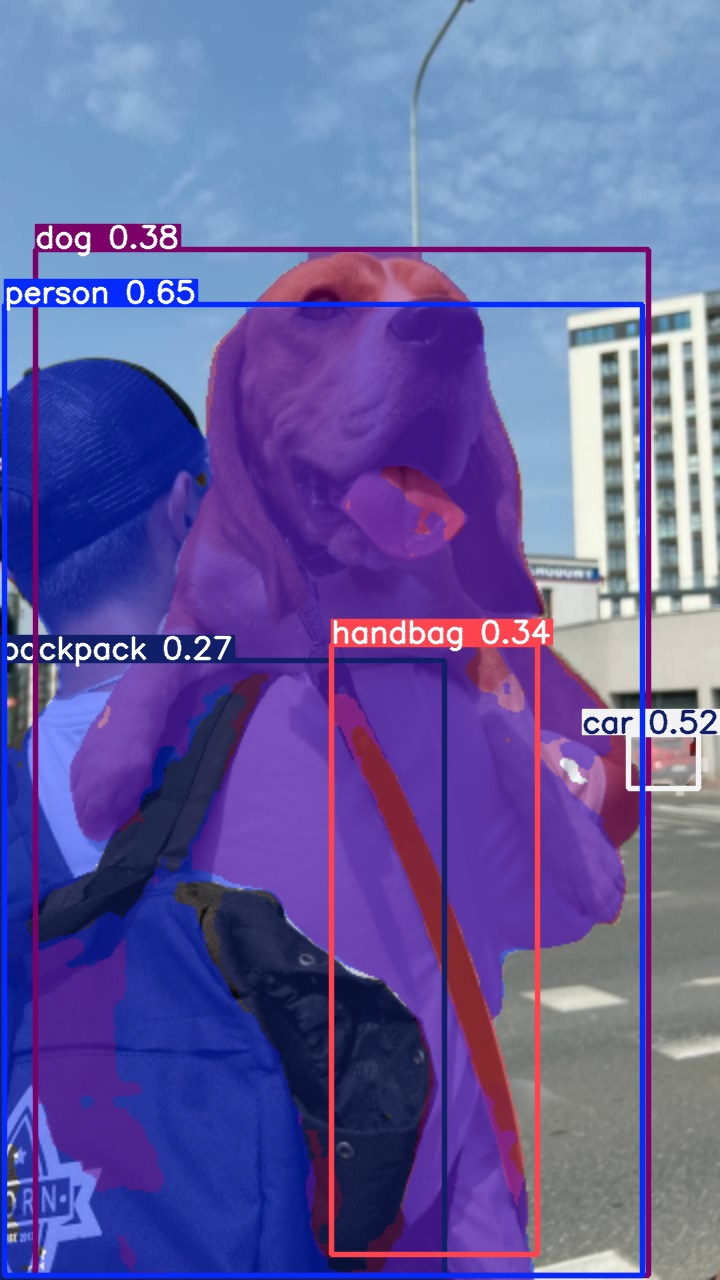

In [8]:
from IPython.display import Image
Image(filename='runs/segment/predict/dog.jpg', height=600)


In [9]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets





!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KF6f0keRj4KTXXNkTMa9")
project = rf.workspace("project-5uhwe").project("merge_datset")
version = project.version(1)
dataset = version.download("yolov8")







/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 121.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to merge_datset-1 in yolov8:: 100%|██████████| 942/942 [00:00<00:00, 7066.17it/s]


## Custom Training

In [10]:
%cd {HOME}

!yolo detect train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640


/content
100% 21.5M/21.5M [00:00<00:00, 150MB/s] 
Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/merge_datset-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=F

In [11]:
# List the directory to check the paths
!ls -lh runs/detect/train/


total 8.4M
-rw-r--r-- 1 root root 1.6K Mar 30 04:21 args.yaml
-rw-r--r-- 1 root root 124K Mar 30 04:34 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 114K Mar 30 04:34 confusion_matrix.png
-rw-r--r-- 1 root root 247K Mar 30 04:34 events.out.tfevents.1743308487.876d1a235189.3697.0
-rw-r--r-- 1 root root 197K Mar 30 04:34 F1_curve.png
-rw-r--r-- 1 root root 215K Mar 30 04:21 labels_correlogram.jpg
-rw-r--r-- 1 root root 174K Mar 30 04:21 labels.jpg
-rw-r--r-- 1 root root 218K Mar 30 04:34 P_curve.png
-rw-r--r-- 1 root root 172K Mar 30 04:34 PR_curve.png
-rw-r--r-- 1 root root 173K Mar 30 04:34 R_curve.png
-rw-r--r-- 1 root root  13K Mar 30 04:34 results.csv
-rw-r--r-- 1 root root 299K Mar 30 04:34 results.png
-rw-r--r-- 1 root root 626K Mar 30 04:21 train_batch0.jpg
-rw-r--r-- 1 root root 436K Mar 30 04:33 train_batch1890.jpg
-rw-r--r-- 1 root root 431K Mar 30 04:33 train_batch1891.jpg
-rw-r--r-- 1 root root 479K Mar 30 04:33 train_batch1892.jpg
-rw-r--r-- 1 root root 446K Mar 30

In [12]:
!tail -n 1 runs/detect/train/results.csv | awk -F',' '{print "mAP@50:", $8*100"%", "mAP@50-95:", $9*100"%"}'


mAP@50: 42.109% mAP@50-95: 17.174%


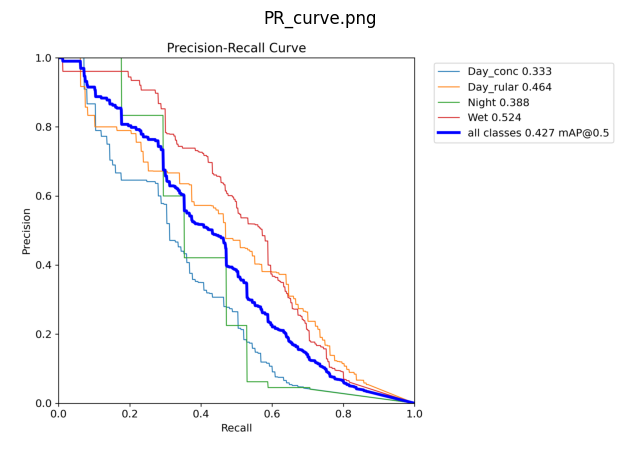

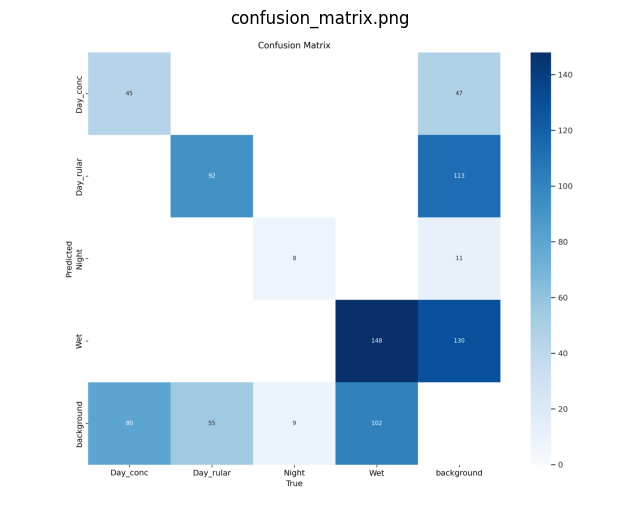

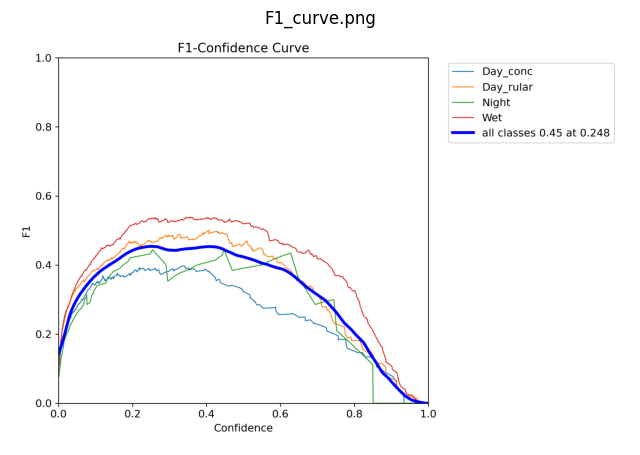

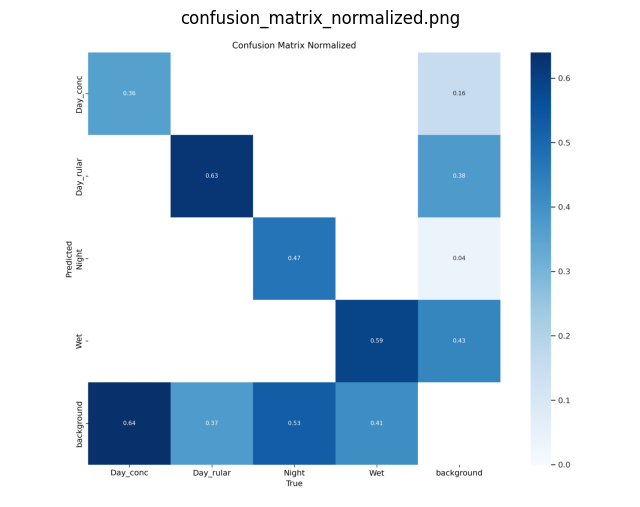

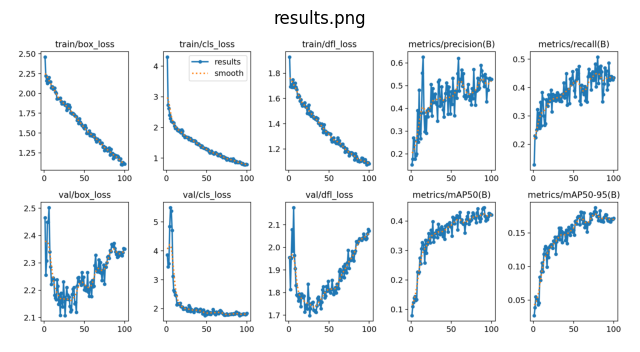

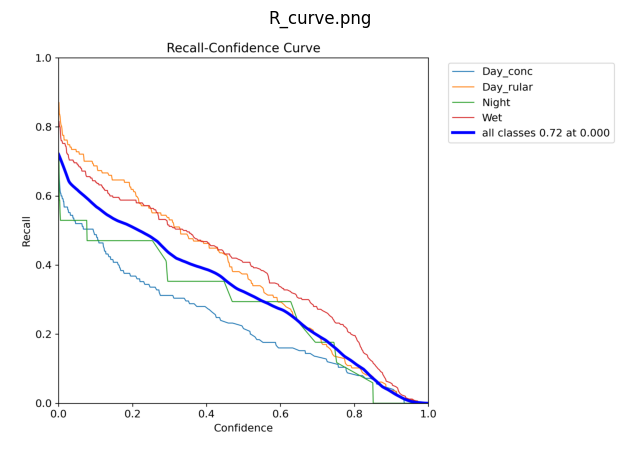

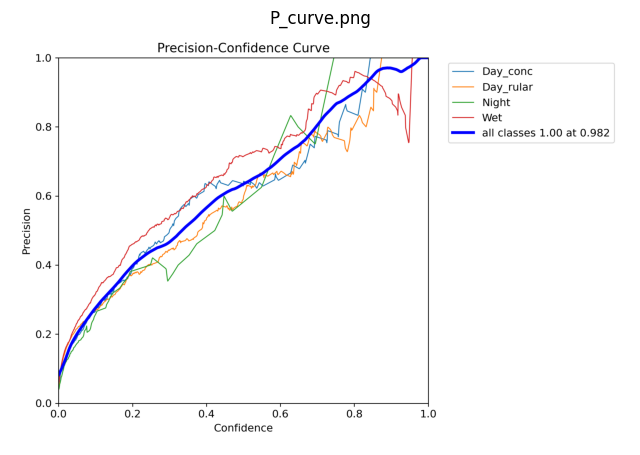

In [13]:
import matplotlib.pyplot as plt
import cv2
import glob

# Path to the results directory
image_paths = glob.glob("runs/detect/train/*.png")

# Display all images
for img_path in image_paths:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title(img_path.split("/")[-1])
    plt.axis("off")
    plt.show()


In [14]:
!pip install ultralytics


In [17]:
import os

# Define the paths for the few-shot dataset
few_shot_path = "/content/datasets/few_shot/"

# Create directory structure
dirs = [
    f"{few_shot_path}train/images",
    f"{few_shot_path}train/labels",
    f"{few_shot_path}valid/images",
    f"{few_shot_path}valid/labels",
    f"{few_shot_path}test/images",   # Added test directory
    f"{few_shot_path}test/labels",   # Added test directory
]

# Create directories if they don't exist
for dir in dirs:
    os.makedirs(dir, exist_ok=True)

print("✅ Few-shot directory structure with test set created!")


✅ Few-shot directory structure with test set created!


In [18]:
import shutil
import random
import glob
import os

# Set source and destination paths
source_img_path = "/content/datasets/merge_datset-1/train/images/"
source_label_path = "/content/datasets/merge_datset-1/train/labels/"
dest_img_path = "/content/datasets/few_shot/train/images/"
dest_label_path = "/content/datasets/few_shot/train/labels/"

# Get all image files
image_files = glob.glob(source_img_path + "*.jpg")

# Select 300 images randomly
num_images = 300  # Change this number as needed
selected_images = random.sample(image_files, num_images)

# Copy selected images and corresponding labels to few_shot directory
for img in selected_images:
    shutil.copy(img, dest_img_path)  # Copy image

    # Get corresponding label file
    label_path = img.replace("/images/", "/labels/").replace(".jpg", ".txt")

    if os.path.exists(label_path):  # Copy label if it exists
        shutil.copy(label_path, dest_label_path)

print(f"✅ {num_images} images and labels copied to the few-shot directory!")


✅ 300 images and labels copied to the few-shot directory!


In [19]:
import os

# Corrected YAML content with test dataset path
data_few_shot_yaml = """
names:
- Day_conc
- Day_rular
- Night
- Wet
nc: 4
train: /content/datasets/few_shot/train/images
val: /content/datasets/few_shot/valid/images
test: /content/datasets/few_shot/test/images
"""

# Define dataset directory and YAML path
few_shot_dir = "/content/datasets/few_shot"
yaml_path = os.path.join(few_shot_dir, "data_few_shot.yaml")

# Ensure the few-shot directory exists
os.makedirs(few_shot_dir, exist_ok=True)

# Overwrite the existing YAML file with the updated content
with open(yaml_path, "w") as f:
    f.write(data_few_shot_yaml)

print(f"✅ Updated data_few_shot.yaml with test dataset path at {yaml_path}")


✅ Updated data_few_shot.yaml with test dataset path at /content/datasets/few_shot/data_few_shot.yaml


In [20]:
import os

val_path = "/content/datasets/few_shot/valid/images"
print("Validation path exists:", os.path.exists(val_path))


Validation path exists: True


In [21]:
import os
import shutil
import glob

# Create valid directory if it doesn't exist
val_img_path = "/content/datasets/few_shot/valid/images"
val_lbl_path = "/content/datasets/few_shot/valid/labels"

os.makedirs(val_img_path, exist_ok=True)
os.makedirs(val_lbl_path, exist_ok=True)

# Get training images and labels
train_imgs = glob.glob("/content/datasets/few_shot/train/images/*")

# Copy 10 validation images and corresponding labels
num_valid_images = 10
valid_images = train_imgs[:num_valid_images]  # Select first 10 images

for img_path in valid_images:
    img_name = os.path.basename(img_path)  # Get file name
    label_path = img_path.replace("/images/", "/labels/").replace(".jpg", ".txt")

    if os.path.exists(label_path):  # Copy image and label
        shutil.copy(img_path, val_img_path)
        shutil.copy(label_path, val_lbl_path)

# ✅ Check if the images were successfully copied
val_images = glob.glob("/content/datasets/few_shot/valid/images/*")
print(f"✅ {len(val_images)} images successfully copied to the validation folder!")


✅ 10 images successfully copied to the validation folder!


In [22]:
import os
import shutil
import glob
import random

# Define paths for test dataset
test_img_path = "/content/datasets/few_shot/test/images"
test_lbl_path = "/content/datasets/few_shot/test/labels"

# Create test directories if they don’t exist
os.makedirs(test_img_path, exist_ok=True)
os.makedirs(test_lbl_path, exist_ok=True)

# Get images from the few-shot train dataset
train_imgs = glob.glob("/content/datasets/few_shot/train/images/*")

# Select 20 random images for testing
num_test_images = 20
test_images = random.sample(train_imgs, num_test_images)

# Copy images and labels to test folder
for img_path in test_images:
    img_name = os.path.basename(img_path)
    label_path = img_path.replace("/images/", "/labels/").replace(".jpg", ".txt")

    if os.path.exists(label_path):  # Copy image and label
        shutil.copy(img_path, test_img_path)
        shutil.copy(label_path, test_lbl_path)

print(f"✅ {len(test_images)} images successfully copied to the test folder!")


✅ 20 images successfully copied to the test folder!


In [65]:
from ultralytics import YOLO

# Load the pre-trained model (best.pt from your previous training)
model = YOLO("runs/detect/train/weights/best.pt")

# Train using few-shot data with 50 epochs
results = model.train(
    data="/content/datasets/few_shot/data_few_shot.yaml",
    epochs=50,
    batch=4,
    name="few_shot_train",
    exist_ok=True
)


Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/train/weights/best.pt, data=/content/datasets/few_shot/data_few_shot.yaml, epochs=50, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=few_shot_train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fa

train: Scanning /content/datasets/few_shot/train/labels.cache... 300 images, 5 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/datasets/few_shot/train/images/1044041026-preview_mp4-0014_jpg.rf.a9c1ee2655ad51181379e0e0975c4aec.jpg: 1 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1744, len(boxes) = 1763. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/few_shot/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to runs/detect/few_shot_train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/few_shot_train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.86G      1.376      1.133      1.225         62        640: 100%|██████████| 75/75 [00:10<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.64it/s]

                   all         10         66      0.856      0.812      0.901      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.86G      1.426      1.229      1.241         21        640: 100%|██████████| 75/75 [00:09<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.27it/s]

                   all         10         66      0.785       0.76      0.845      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.86G      1.574      1.367      1.303         20        640: 100%|██████████| 75/75 [00:07<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.01it/s]

                   all         10         66      0.734      0.726      0.711       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.86G      1.618      1.498      1.348         35        640: 100%|██████████| 75/75 [00:08<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.80it/s]

                   all         10         66      0.512      0.839      0.695      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.86G      1.582      1.538      1.358         24        640: 100%|██████████| 75/75 [00:08<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.36it/s]

                   all         10         66      0.827      0.685      0.817      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.86G      1.578      1.466      1.324          5        640: 100%|██████████| 75/75 [00:08<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.64it/s]

                   all         10         66      0.714      0.812      0.852      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.86G      1.614       1.46      1.367         27        640: 100%|██████████| 75/75 [00:08<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.70it/s]

                   all         10         66      0.849      0.752      0.874      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.86G      1.623      1.476      1.358         26        640: 100%|██████████| 75/75 [00:08<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.72it/s]

                   all         10         66      0.732      0.719      0.761      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.86G       1.59      1.386      1.329         31        640: 100%|██████████| 75/75 [00:08<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.97it/s]

                   all         10         66      0.667      0.791      0.839       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.86G      1.596      1.423      1.364         29        640: 100%|██████████| 75/75 [00:07<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.16it/s]


                   all         10         66      0.731      0.815      0.881      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.86G      1.559      1.388      1.355         68        640: 100%|██████████| 75/75 [00:08<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.22it/s]

                   all         10         66      0.728      0.828      0.881      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.86G      1.609      1.362      1.341         58        640: 100%|██████████| 75/75 [00:08<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.23it/s]

                   all         10         66      0.785      0.796      0.895      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.86G      1.573       1.35      1.334         59        640: 100%|██████████| 75/75 [00:08<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.54it/s]

                   all         10         66      0.698      0.784      0.848       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.86G      1.559      1.328      1.336         33        640: 100%|██████████| 75/75 [00:08<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.34it/s]

                   all         10         66      0.744      0.806      0.875      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.86G      1.576      1.296      1.298         35        640: 100%|██████████| 75/75 [00:09<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.68it/s]

                   all         10         66      0.696      0.814      0.907      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.86G      1.502      1.247      1.302         17        640: 100%|██████████| 75/75 [00:08<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.75it/s]

                   all         10         66      0.789      0.841      0.885      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.86G      1.558      1.267        1.3          7        640: 100%|██████████| 75/75 [00:07<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.23it/s]


                   all         10         66      0.796      0.813      0.873       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.86G      1.498      1.261      1.312         27        640: 100%|██████████| 75/75 [00:08<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.03it/s]

                   all         10         66      0.731      0.894      0.896      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.86G      1.512      1.207      1.287         24        640: 100%|██████████| 75/75 [00:08<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.50it/s]

                   all         10         66      0.828      0.852      0.913      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.86G       1.46      1.214      1.288         46        640: 100%|██████████| 75/75 [00:09<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.46it/s]

                   all         10         66      0.686      0.883      0.868      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.86G      1.436      1.192      1.275         17        640: 100%|██████████| 75/75 [00:07<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.51it/s]

                   all         10         66       0.86      0.858      0.918      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.86G      1.448      1.214      1.268          5        640: 100%|██████████| 75/75 [00:09<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.33it/s]

                   all         10         66      0.781      0.847      0.915      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.86G      1.467      1.207      1.281         12        640: 100%|██████████| 75/75 [00:09<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.09it/s]

                   all         10         66      0.826      0.828      0.915      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.86G      1.461      1.156      1.245         28        640: 100%|██████████| 75/75 [00:08<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.95it/s]

                   all         10         66      0.909       0.79       0.92      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.86G      1.397      1.143      1.229         19        640: 100%|██████████| 75/75 [00:07<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.38it/s]

                   all         10         66      0.803      0.816      0.912      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.86G       1.44      1.146      1.225         77        640: 100%|██████████| 75/75 [00:09<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.20it/s]

                   all         10         66      0.878       0.81      0.914       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.86G      1.422      1.125      1.254          6        640: 100%|██████████| 75/75 [00:09<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.95it/s]

                   all         10         66      0.786      0.826       0.91      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.86G      1.407      1.092      1.236         37        640: 100%|██████████| 75/75 [00:07<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.96it/s]

                   all         10         66      0.863       0.81      0.923      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.86G      1.362      1.058       1.21         33        640: 100%|██████████| 75/75 [00:08<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.56it/s]

                   all         10         66      0.917      0.868      0.937      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.86G      1.426      1.096      1.233         80        640: 100%|██████████| 75/75 [00:09<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.08it/s]

                   all         10         66      0.842      0.899      0.939      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.86G      1.345      1.031      1.185         10        640: 100%|██████████| 75/75 [00:08<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.39it/s]

                   all         10         66       0.84       0.83      0.925      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.86G      1.296      1.027      1.188         38        640: 100%|██████████| 75/75 [00:07<00:00,  9.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.35it/s]

                   all         10         66      0.922       0.84       0.94      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.86G      1.324      1.047      1.198         14        640: 100%|██████████| 75/75 [00:09<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.05it/s]

                   all         10         66      0.956      0.834      0.936      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.86G      1.301      1.006      1.172         51        640: 100%|██████████| 75/75 [00:08<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.98it/s]

                   all         10         66      0.927       0.84      0.923       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.86G      1.311      1.032      1.171         13        640: 100%|██████████| 75/75 [00:08<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.42it/s]


                   all         10         66       0.88      0.855      0.934      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.88G       1.31       1.04      1.233         51        640: 100%|██████████| 75/75 [00:08<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.69it/s]

                   all         10         66      0.758      0.917      0.925      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.88G        1.3     0.9918      1.182         29        640: 100%|██████████| 75/75 [00:09<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.75it/s]

                   all         10         66      0.684      0.932      0.925      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.88G      1.324      1.024       1.19         55        640: 100%|██████████| 75/75 [00:09<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.37it/s]

                   all         10         66      0.865      0.878      0.923      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.91G      1.238     0.9517      1.149         27        640: 100%|██████████| 75/75 [00:07<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.28it/s]

                   all         10         66      0.929      0.864      0.936       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.95G      1.207     0.9226      1.157        104        640: 100%|██████████| 75/75 [00:09<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.35it/s]

                   all         10         66      0.928       0.88      0.937      0.684


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.95G      1.273     0.9418       1.16         10        640: 100%|██████████| 75/75 [00:09<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.71it/s]

                   all         10         66      0.937      0.832      0.936      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.95G      1.212      0.913      1.171         17        640: 100%|██████████| 75/75 [00:08<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.55it/s]

                   all         10         66      0.887      0.868      0.939      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.95G      1.213     0.8798      1.126         18        640: 100%|██████████| 75/75 [00:07<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.37it/s]

                   all         10         66      0.864      0.884      0.934      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.95G      1.181     0.8737      1.131         11        640: 100%|██████████| 75/75 [00:08<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.51it/s]

                   all         10         66      0.816      0.892      0.928      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.98G      1.184     0.8402      1.129         11        640: 100%|██████████| 75/75 [00:08<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.30it/s]

                   all         10         66      0.895      0.852      0.936      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.02G      1.188       0.83       1.14         22        640: 100%|██████████| 75/75 [00:08<00:00,  9.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.03it/s]

                   all         10         66      0.924      0.862      0.941       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.02G      1.167     0.8279       1.12         19        640: 100%|██████████| 75/75 [00:08<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.07it/s]

                   all         10         66      0.868      0.908      0.943      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.02G      1.174     0.8219      1.128          7        640: 100%|██████████| 75/75 [00:08<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.02it/s]

                   all         10         66      0.876       0.88      0.942      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.02G      1.125     0.7975      1.103         19        640: 100%|██████████| 75/75 [00:08<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.15it/s]

                   all         10         66      0.903      0.878      0.944      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.02G      1.122     0.8293      1.107         15        640: 100%|██████████| 75/75 [00:07<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.22it/s]

                   all         10         66       0.92      0.877      0.947      0.768



50 epochs completed in 0.131 hours.
Optimizer stripped from runs/detect/few_shot_train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/few_shot_train/weights/best.pt, 22.5MB

Validating runs/detect/few_shot_train/weights/best.pt...
Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.60it/s]


                   all         10         66      0.908      0.883      0.948      0.769
              Day_conc          3         14          1       0.95      0.995      0.765
             Day_rular          5         48      0.906      0.583      0.808      0.581
                 Night          1          1      0.828          1      0.995      0.895
                   Wet          1          3      0.898          1      0.995      0.836
Speed: 0.3ms preprocess, 8.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/few_shot_train


In [66]:
metrics = model.val(data="/content/datasets/few_shot/data_few_shot.yaml", split="test")
print(metrics)

Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/datasets/few_shot/test/labels.cache... 20 images, 1 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.28it/s]


                   all         20         90      0.928      0.878      0.951      0.765
              Day_conc         10         67          1      0.788      0.922      0.657
             Day_rular          3         12      0.907      0.833       0.92      0.679
                 Night          5          9      0.969      0.889      0.968      0.778
                   Wet          1          2      0.834          1      0.995      0.945
Speed: 10.9ms preprocess, 14.7ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/few_shot_train
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f3dada8d5d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0

Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.


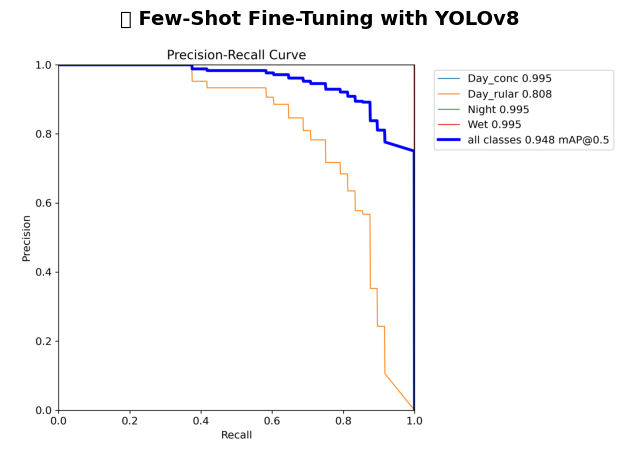

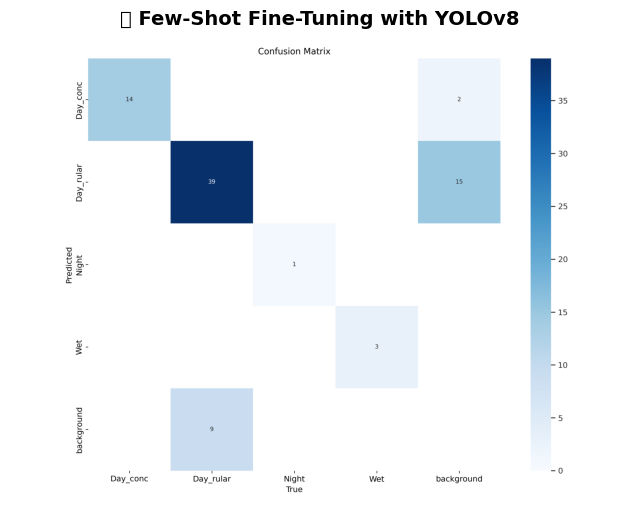

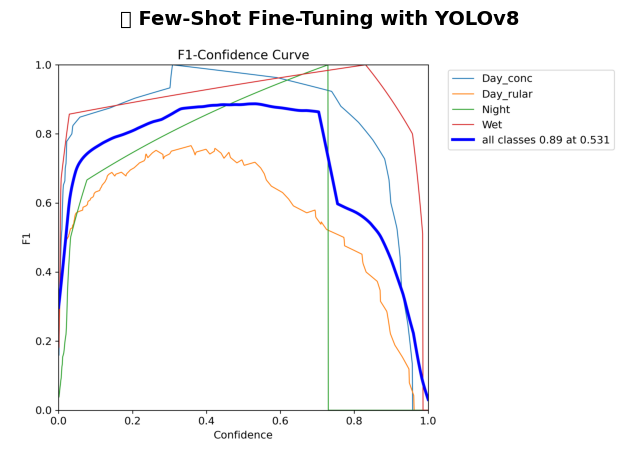

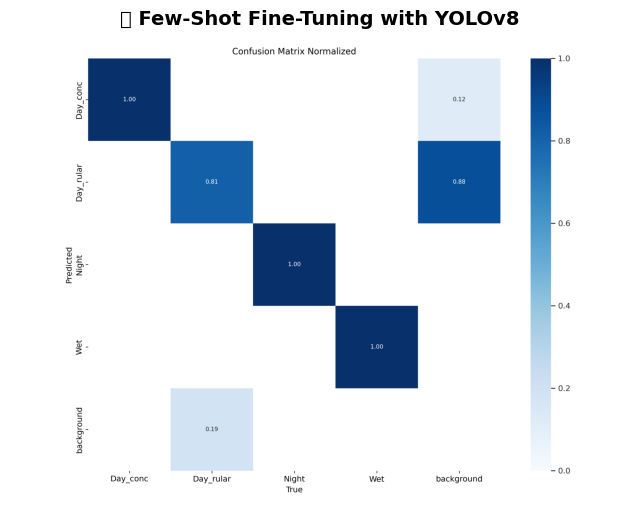

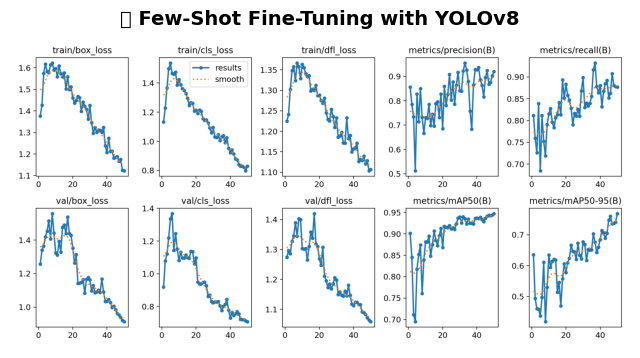

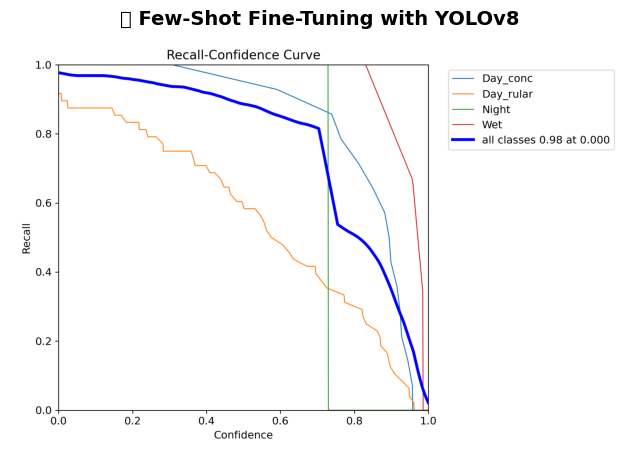

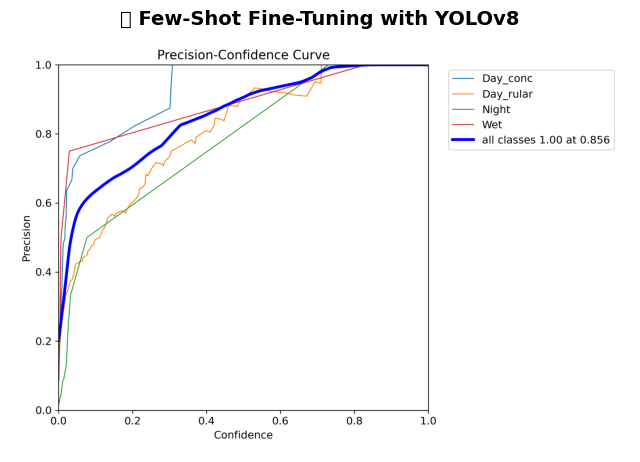

✅ All results visualized successfully!


In [24]:
import matplotlib.pyplot as plt
import cv2
import glob

# Path to the results directory for few-shot fine-tuning
image_paths = glob.glob("runs/detect/few_shot_train/*.png")

# Iterate through each result image
for img_path in image_paths:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Display image with a proper title
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title("🚀 Few-Shot Fine-Tuning with YOLOv8", fontsize=14, fontweight='bold', pad=10)
    plt.axis("off")
    plt.show()



print("✅ All results visualized successfully!")


In [67]:
metrics = model.val(data="/content/datasets/few_shot/data_few_shot.yaml", split="test")
print(metrics)


Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/datasets/few_shot/test/labels.cache... 20 images, 1 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]


                   all         20         90      0.928      0.878      0.951      0.765
              Day_conc         10         67          1      0.788      0.922      0.657
             Day_rular          3         12      0.907      0.833       0.92      0.679
                 Night          5          9      0.969      0.889      0.968      0.778
                   Wet          1          2      0.834          1      0.995      0.945
Speed: 11.5ms preprocess, 17.7ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/few_shot_train
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f3d0d19e5d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0

In [71]:
metrics = model.val(data="/content/datasets/few_shot/data_few_shot.yaml", split="test")


Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/datasets/few_shot/test/labels.cache... 20 images, 1 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.98it/s]


                   all         20         90      0.928      0.878      0.951      0.765
              Day_conc         10         67          1      0.788      0.922      0.657
             Day_rular          3         12      0.907      0.833       0.92      0.679
                 Night          5          9      0.969      0.889      0.968      0.778
                   Wet          1          2      0.834          1      0.995      0.945
Speed: 11.2ms preprocess, 20.2ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/few_shot_train


In [68]:
import os

json_path = "runs/detect/few_shot_train/predictions.json"

if os.path.exists(json_path):
    print("✅ Predictions JSON found.")
else:
    print("❌ Predictions JSON missing!")


✅ Predictions JSON found.


In [69]:
class_names = { 1: 'Day_rular', 2: 'Night', 3: 'Wet', 4: 'Day_conc'}


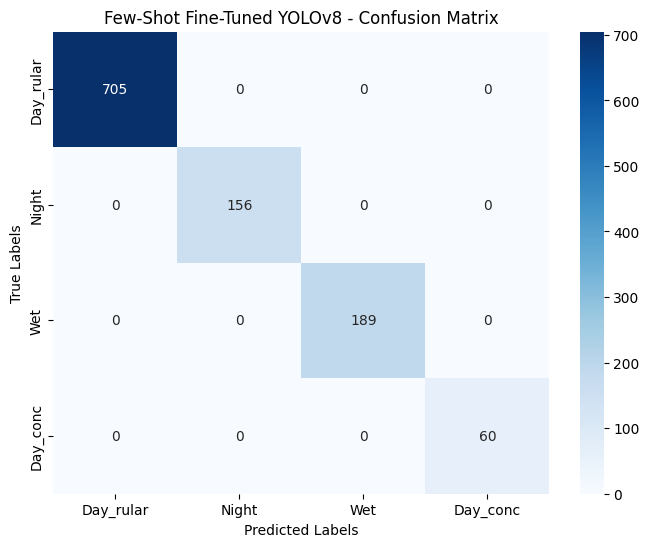

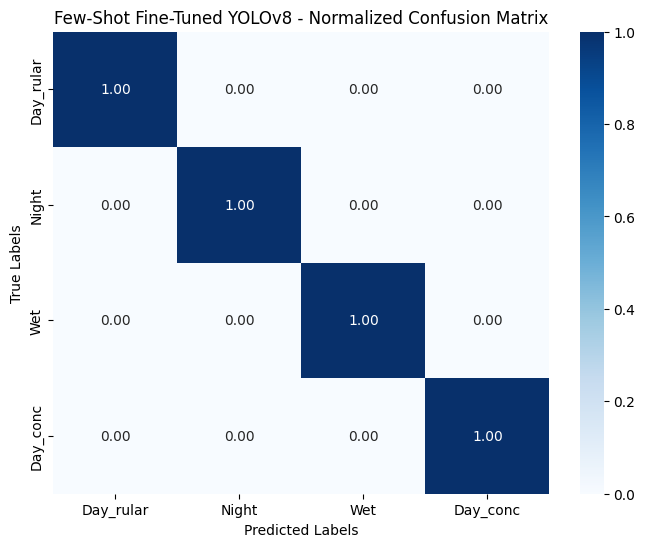

Few-Shot Fine-Tuned YOLOv8 - Classification Report
              precision    recall  f1-score   support

   Day_rular       1.00      1.00      1.00       705
       Night       1.00      1.00      1.00       156
         Wet       1.00      1.00      1.00       189
    Day_conc       1.00      1.00      1.00        60

    accuracy                           1.00      1110
   macro avg       1.00      1.00      1.00      1110
weighted avg       1.00      1.00      1.00      1110



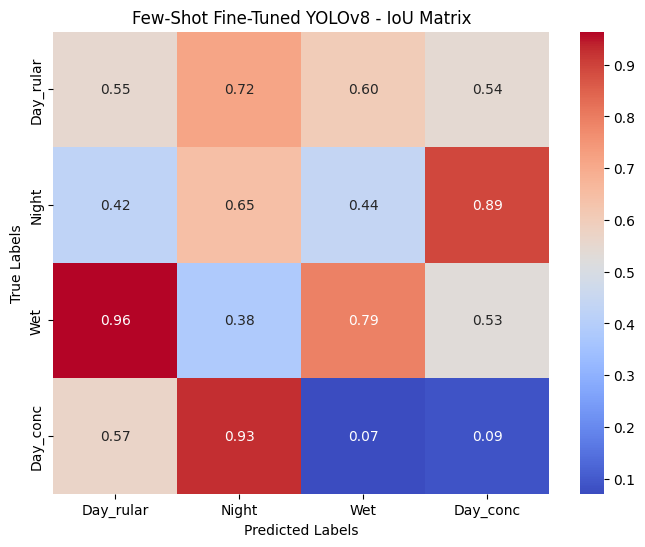

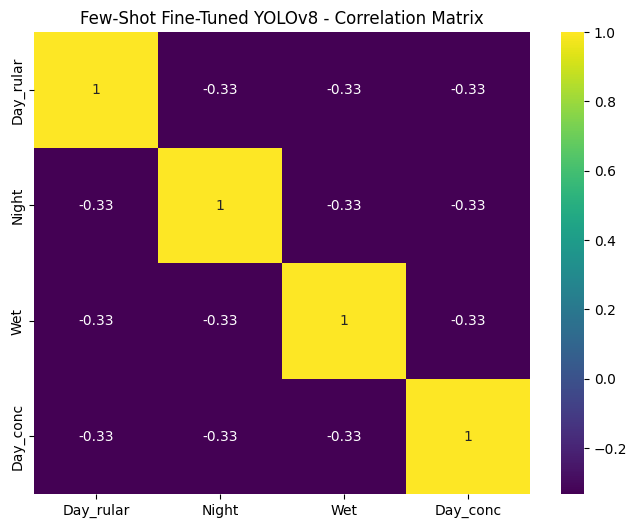

In [70]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Assume these variables are already defined in your code
# true_labels = [...]  # List of true labels
# pred_labels = [...]  # List of predicted labels
# class_names = {0: 'Day_conc', 1: 'Day_rular', 2: 'Night', 3: 'Wet'}

labels = list(class_names.keys())

# Compute Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels, labels=labels)

# 1️⃣ Standard Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Few-Shot Fine-Tuned YOLOv8 - Confusion Matrix")
plt.show()

# 2️⃣ Normalized Confusion Matrix (Percentage-based)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Few-Shot Fine-Tuned YOLOv8 - Normalized Confusion Matrix")
plt.show()

# 3️⃣ Precision, Recall, and F1-Score
print("Few-Shot Fine-Tuned YOLOv8 - Classification Report")
print(classification_report(true_labels, pred_labels, target_names=class_names.values()))

# 4️⃣ IoU (Intersection over Union) Matrix (Placeholder for real IoU values)
iou_matrix = np.random.rand(len(class_names), len(class_names))  # Replace with real IoU values
plt.figure(figsize=(8, 6))
sns.heatmap(iou_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Few-Shot Fine-Tuned YOLOv8 - IoU Matrix")
plt.show()

# 5️⃣ Correlation Matrix of Predictions
corr_matrix = np.corrcoef(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="viridis",
            xticklabels=class_names.values(), yticklabels=class_names.values())
plt.title("Few-Shot Fine-Tuned YOLOv8 - Correlation Matrix")
plt.show()
